In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('results.csv')
del raw_data['error?']

In [3]:
grouped = raw_data.groupby(['size', 'method'])

result = pd.DataFrame()
for group_name, group_data in grouped:
    method = group_name[1]
    lowest_tick = group_data['ticks'].min()
    filtered = group_data[group_data['ticks'] == lowest_tick]
    sorted_data = filtered.sort_values(by='method')
    result = pd.concat([result, sorted_data])

del result['chunkSize']
print(result.to_string(index=False))

     size                    method      ticks
     1000              AtomicMethod     198917
     1000   AtomicMethodInefficient     217083
     1000            BlockingMethod     225042
     1000 BlockingMethodInefficient     206708
     1000        SingleThreadMethod       8416
    10000              AtomicMethod     197000
    10000   AtomicMethodInefficient     208916
    10000            BlockingMethod     204375
    10000 BlockingMethodInefficient     290917
    10000        SingleThreadMethod      46917
   100000              AtomicMethod     369917
   100000   AtomicMethodInefficient    1130125
   100000            BlockingMethod     397625
   100000 BlockingMethodInefficient    4151500
   100000        SingleThreadMethod     406625
  1000000              AtomicMethod    2314333
  1000000   AtomicMethodInefficient   11867584
  1000000            BlockingMethod    2352000
  1000000 BlockingMethodInefficient   30740417
  1000000        SingleThreadMethod    4035458
 10000000    

In [4]:
def get_points_for_method(data, method):
    method_data = data[data['method'] == method]
    xs = list(method_data['size'])
    ys = list(method_data['ticks'])
    return xs, ys

points_per_method = {method: get_points_for_method(result, method) for method in result['method'].unique()}
    
print(points_per_method)

{'AtomicMethod': ([1000, 10000, 100000, 1000000, 10000000, 100000000], [198917, 197000, 369917, 2314333, 21345625, 211549250]), 'AtomicMethodInefficient': ([1000, 10000, 100000, 1000000, 10000000, 100000000], [217083, 208916, 1130125, 11867584, 115688625, 1179176042]), 'BlockingMethod': ([1000, 10000, 100000, 1000000, 10000000, 100000000], [225042, 204375, 397625, 2352000, 21825333, 215383792]), 'BlockingMethodInefficient': ([1000, 10000, 100000, 1000000, 10000000, 100000000], [206708, 290917, 4151500, 30740417, 581908417, 6214103875]), 'SingleThreadMethod': ([1000, 10000, 100000, 1000000, 10000000, 100000000], [8416, 46917, 406625, 4035458, 40410375, 405648500])}


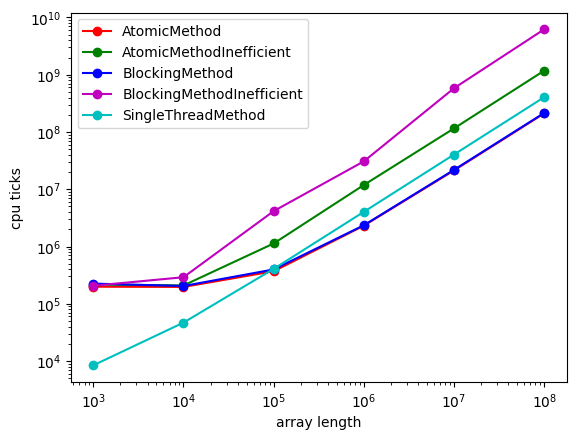

In [6]:
for method, color in zip(points_per_method, ['r', 'g', 'b', 'm', 'c']):
    xs, ys = points_per_method[method]
    plt.plot(xs, ys, label=method, color=color, marker='o')
    
plt.xlabel('array length')
plt.ylabel('cpu ticks')

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.savefig('results.png')